## Descrição do projeto 

In [130]:
# Importação das bibliotecas

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

## Obtenção dos dados

In [131]:
# Import do arquivo Use_of_force.csv para um DataFrame

df = pd.read_csv('./datasets/Use_Of_Force.csv')

**Dicionário de variáveis**

Abaixo temo a descrição dos atributos contidos dentro desse conjunto de dados: 

- `ID` - Número de identificação do uso de força
- `Incident_Num` - Número identificador do incidente de força
- `Incident_Type` - Classificação do uso de força
- `Ocurred_date_time` - Data e hora do ocorrido 
- `Precinct` - Distrito onde ocorreu o uso de força
- `Sector` -  Setor onde ocorreu o uso de força
- `Beat` - 'Batida' onde ocorreu uso da força
- `Officer_ID` - Número identificor do oficial 
- `Subject_ID` - Número identificador do sujeito
- `Subject_Race` - Raça do sujeito do uso de força
- `Subject_Gender` - Gênero do sujeito do uso da força

In [132]:
df.head()

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,2023UOF-0112-2422-30042,70534,Level 1 - Use of Force,01/14/2023 09:15:00 PM,OOJ,OOJ,99,2419,30914,White,Female
1,2018UOF-0300-2313-14902,21833,Level 1 - Use of Force,03/08/2018 03:27:00 PM,North,UNION,U1,2309,15792,White,Female
2,2015UOF-1167-1239-5068,6075,Level 1 - Use of Force,07/15/2015 04:26:00 AM,North,BOY,B1,1646,5032,Black or African American,Male
3,2023UOF-0718-2442-425,73829,Level 1 - Use of Force,08/11/2023 08:15:00 PM,East,GEORGE,G1,2438,424,White,Female
4,2016UOF-0263-1901-7582,9918,Level 1 - Use of Force,02/22/2016 08:31:00 PM,East,EDWARD,E2,1848,7531,Black or African American,Male


In [133]:
#Informações gerais do dataset

print('Informações gerais: ')
print('-------'*10)
print(df.info())
print('-------'*10)
print("Tamanho do conjunto de dados")
#print(f'{df.shape}')

Informações gerais: 
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17262 entries, 0 to 17261
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 17262 non-null  object
 1   Incident_Num       17262 non-null  int64 
 2   Incident_Type      17262 non-null  object
 3   Occured_date_time  17262 non-null  object
 4   Precinct           17262 non-null  object
 5   Sector             15820 non-null  object
 6   Beat               17262 non-null  object
 7   Officer_ID         17262 non-null  int64 
 8   Subject_ID         17262 non-null  int64 
 9   Subject_Race       17262 non-null  object
 10  Subject_Gender     17262 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.4+ MB
None
----------------------------------------------------------------------
Tamanho do conjunto de dados


In [134]:
#Conversão das datas para o formato datetime

df['Occured_date_time'] = pd.to_datetime(df['Occured_date_time'])

C:\Users\Jp Lima\AppData\Local\Temp\ipykernel_15428\536686796.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Occured_date_time'] = pd.to_datetime(df['Occured_date_time'])


### Dados Faltantes

Durante a nossa análise exploratória, constatamos que, das 11 colunas presentes em nosso conjunto de dados, a coluna `Sector` contém aproximadamente 1442 amostras ausentes.

In [135]:
df.isnull().sum()

ID                      0
Incident_Num            0
Incident_Type           0
Occured_date_time       0
Precinct                0
Sector               1442
Beat                    0
Officer_ID              0
Subject_ID              0
Subject_Race            0
Subject_Gender          0
dtype: int64

## Visualização de dados 

Neste gáfico buscamos entender de que forma se distribuia os incidentes do uso da força ao longo dos anos, meses.

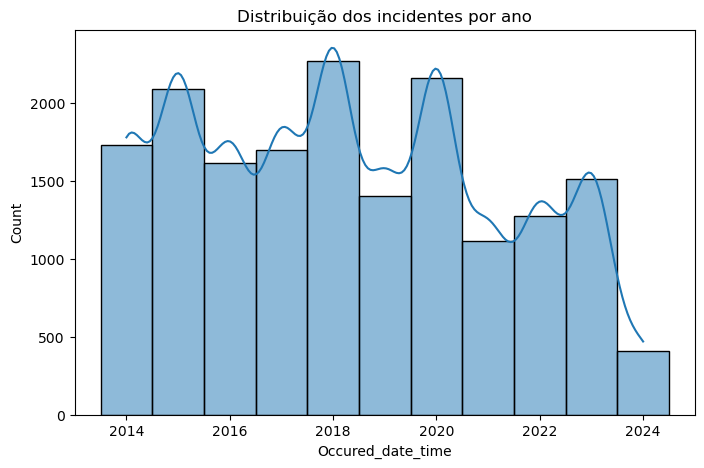

In [136]:

plt.figure(figsize=(8,5))
plt.title('Distribuição dos incidentes por ano')
sns.histplot(df, x=df['Occured_date_time'].dt.year, discrete=True, kde=True);
plt.xlim(2013,2024+1)
plt.show()

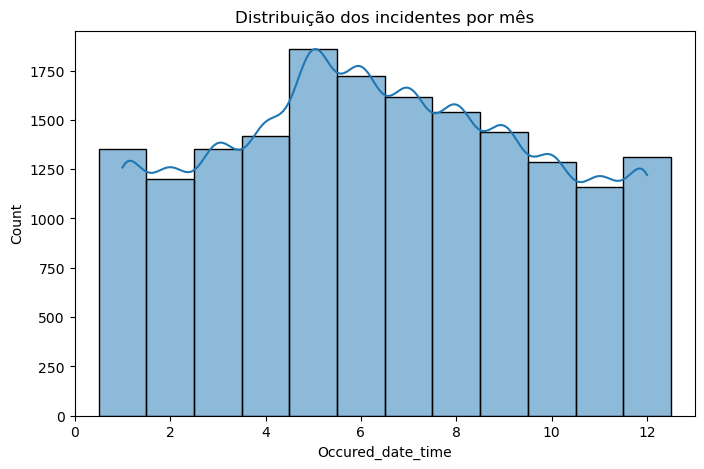

In [137]:
plt.figure(figsize=(8,5))
plt.title('Distribuição dos incidentes por mês')
sns.histplot(df, x=df['Occured_date_time'].dt.month, kde=True, discrete=True);
plt.xlim(0,12+1)
plt.show()

Buscamos compreender em que regiões da comtém uma maior incidência.

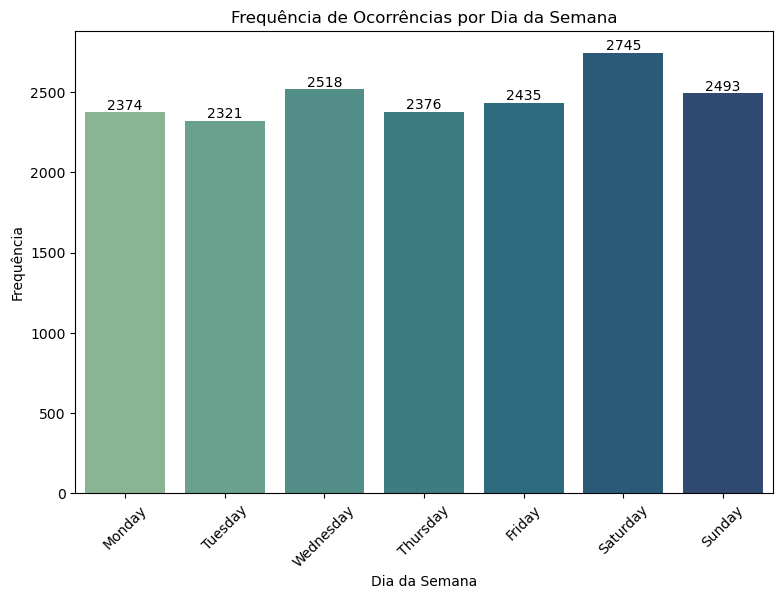

In [138]:
df['day_of_week'] = df['Occured_date_time'].dt.day_name()

day_counts = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0).reset_index()
day_counts.columns = ['day_of_week', 'count']

plt.figure(figsize=(9, 6))
ax =sns.barplot(data=day_counts, x='day_of_week', y='count', palette="crest",estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Frequência de Ocorrências por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

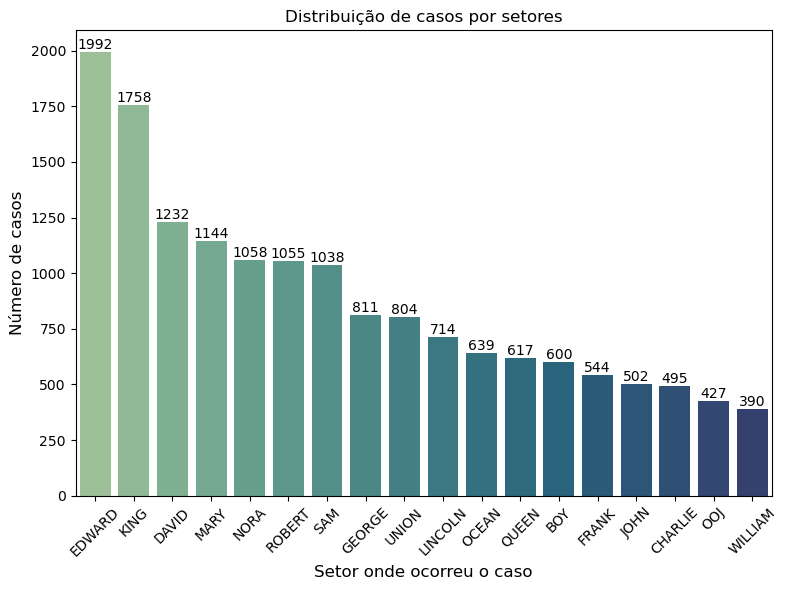

In [139]:
fig, ax = plt.subplots(figsize=(8,6))

qnt_sector = df['Sector'].value_counts()
qnt_sector = pd.DataFrame(qnt_sector)

plt.xticks(rotation=45)
sns.barplot(x=qnt_sector.index, y=qnt_sector['count'], palette="crest", ax=ax, data=qnt_sector)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("Distribuição de casos por setores")
ax.set_ylabel("Número de casos",fontdict={'fontsize':12})
ax.set_xlabel("Setor onde ocorreu o caso", fontdict={'fontsize':12})

fig.tight_layout();

##### Retirar os dados sujos e faltantes

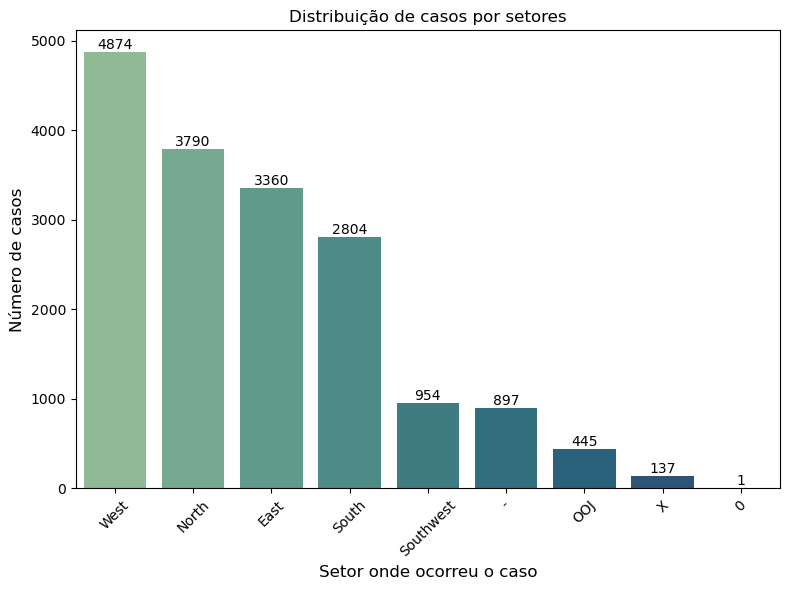

In [140]:
fig, ax = plt.subplots(figsize=(8,6))

qnt_sector = df['Precinct'].value_counts()
qnt_sector = pd.DataFrame(qnt_sector)

plt.xticks(rotation=45)
sns.barplot(x=qnt_sector.index, y=qnt_sector['count'], palette="crest", ax=ax, data=qnt_sector)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("Distribuição de casos por setores")
ax.set_ylabel("Número de casos",fontdict={'fontsize':12})
ax.set_xlabel("Setor onde ocorreu o caso", fontdict={'fontsize':12})

fig.tight_layout();

## Investigação demográfica

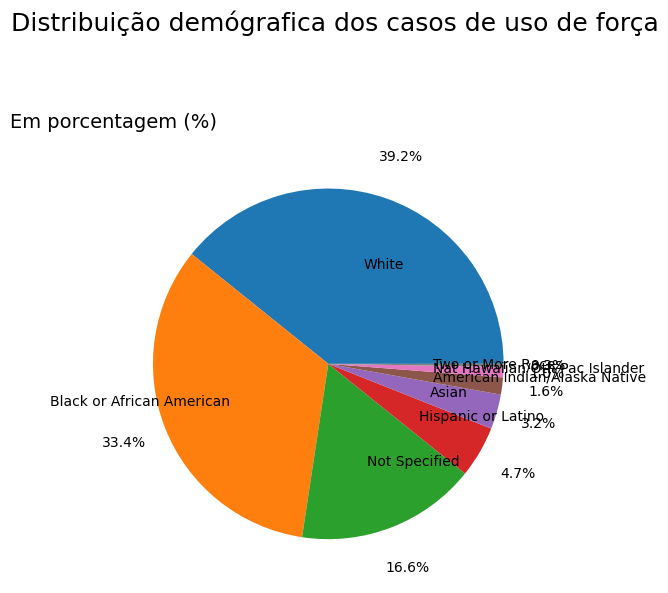

In [162]:
fig, ax = plt.subplots(figsize=(8,6))
qnt_race = df['Subject_Race'].value_counts()
qnt_race = pd.DataFrame(qnt_race)

ax.pie(data=qnt_race,labels=qnt_race.index, x='count', autopct='%1.1f%%', pctdistance=1.25, labeldistance=.6);
plt.suptitle('Distribuição demógrafica dos casos de uso de força', size=18)
plt.title('Em porcentagem (%)', fontsize=14, pad = 15, x = 0.01, y = 0.99) 
plt.tight_layout(rect=[0, 0, 1, 0.9]) 

<Axes: ylabel='count'>

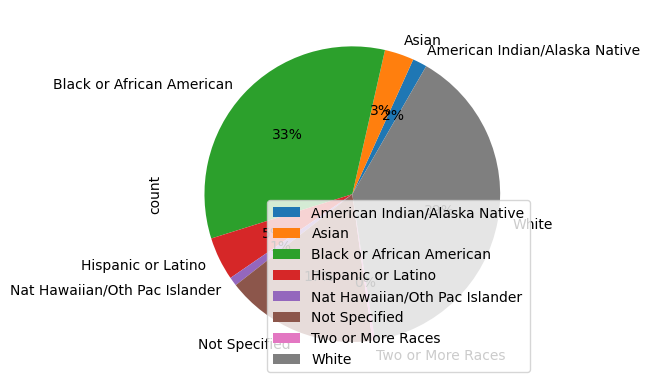

In [166]:
qnt_race.groupby(qnt_race.index).sum().plot(kind='pie', y='count', autopct='%1.0f%%', startangle=60) 

In [164]:
qnt_race



,count
Subject_Race,
White,6770
Black or African American,5764
Not Specified,2871
Hispanic or Latino,818
Asian,554
American Indian/Alaska Native,272
Nat Hawaiian/Oth Pac Islander,166
Two or More Races,47
